# Part 2. Multidimensional Scaling

### Plotting the Shapefiles

This pulls in the distance matrix from before and plots the points. It then compares the shapefiles.

Process Complete.


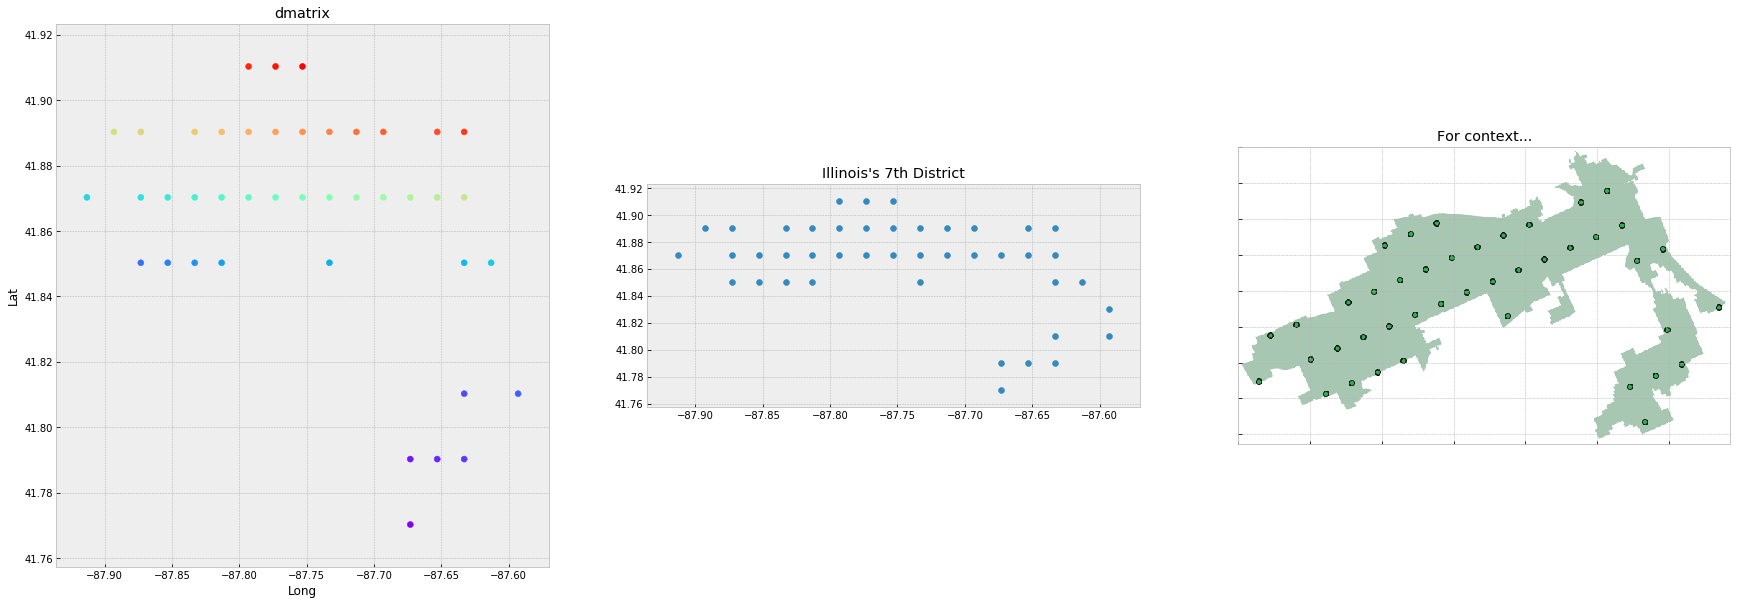

In [19]:
import pandas as pd
import geopandas as gpd
from matplotlib import pyplot as plt
import matplotlib
import numpy as np

# This queues up the distance matrix from the distance API notebook.
dmatrix = pd.read_pickle('Shapes/Illinois/IL_7_grid_2_clip.pkl')

# Creates a list of points from the dataframe header to plot.
geopoints = list(dmatrix)

# This plots the points from the distance matrix headings.
lat = []
long = []
for point in geopoints:
    long.append(point[0])
    lat.append(point[1])
    
# This compares to the shapefile.
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

# Plots the original matrix.
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(geopoints)))
ax1.scatter(lat,long, c = colors)
ax1.set_title('dmatrix')
ax1.set_ylabel('Lat')
ax1.set_xlabel('Long')

# Plots the district shapefile with the original points.
pts = 'Shapes/Illinois/IL_7_grid_2_clip.shp'
CD_grid = gpd.read_file(pts)
CD_grid.plot(ax=ax2)
ax2.set_title("Illinois's 7th District")

# Plots the point grid for the district on top of a basemap.
img = plt.imread('Shapes/Pictures/IL_7_0.02.png')
ax3.imshow(img)
ax3.set_title('For context...')
ax3.set_yticklabels([])
ax3.set_xticklabels([])
print('Process Complete.')

In [13]:
from sklearn import manifold
import numpy as np
from sklearn.metrics import pairwise_distances

# This removes a NaN at the intersection of the final row/column.
ttm = dmatrix.fillna(0)  # ttm = travel time matrix

# Showing the Travel Time Matrix to check nothing has changed since saving the distance matrix in the Bing API notebook.
ttm

,"(41.77029800000075, -87.67307900000075)","(41.79029800000075, -87.67307900000075)","(41.79029800000075, -87.65307900000076)","(41.79029800000075, -87.63307900000076)","(41.810298000000756, -87.63307900000076)","(41.810298000000756, -87.59307900000077)","(41.85029800000076, -87.87307900000071)","(41.85029800000076, -87.85307900000072)","(41.85029800000076, -87.83307900000072)","(41.85029800000076, -87.81307900000073)",...,"(41.89029800000077, -87.77307900000073)","(41.89029800000077, -87.75307900000074)","(41.89029800000077, -87.73307900000074)","(41.89029800000077, -87.71307900000075)","(41.89029800000077, -87.69307900000075)","(41.89029800000077, -87.65307900000076)","(41.89029800000077, -87.63307900000076)","(41.91029800000077, -87.79307900000073)","(41.91029800000077, -87.77307900000073)","(41.91029800000077, -87.75307900000074)"
"(41.77029800000075, -87.67307900000075)",0,318,623,866,1126,1559,2777,2516,2424,2565,...,2266,2361,2312,2101,2240,1699,1760,2920,2876,2878
"(41.79029800000075, -87.67307900000075)",318,0,389,579,978,1370,2572,2310,2220,2357,...,2072,2168,2115,1909,2036,1501,1567,2720,2689,2668
"(41.79029800000075, -87.65307900000076)",623,389,0,386,805,1168,2350,2093,2002,2136,...,1861,1960,1915,1707,1822,1304,1360,2496,2486,2445
"(41.79029800000075, -87.63307900000076)",866,579,386,0,564,1101,2127,1875,1780,1921,...,1649,1751,1713,1501,1611,1117,1163,2274,2259,2226
"(41.810298000000756, -87.63307900000076)",1126,978,805,564,0,809,2036,1783,1692,1833,...,1560,1670,1631,1416,1521,1038,1085,2187,2170,2139
"(41.810298000000756, -87.59307900000077)",1559,1370,1168,1101,809,0,2198,1942,1850,1986,...,1713,1810,1774,1562,1673,1176,1221,2341,2329,2289
"(41.85029800000076, -87.87307900000071)",2777,2572,2350,2127,2036,2198,0,284,584,563,...,1209,1570,1547,1576,1567,1866,1932,1615,1654,1908
"(41.85029800000076, -87.85307900000072)",2516,2310,2093,1875,1783,1942,284,0,400,379,...,993,1348,1329,1352,1338,1636,1698,1386,1424,1675
"(41.85029800000076, -87.83307900000072)",2424,2220,2002,1780,1692,1850,584,400,0,296,...,1076,1430,1410,1438,1428,1723,1783,1474,1511,1761
"(41.85029800000076, -87.81307900000073)",2565,2357,2136,1921,1833,1986,563,379,296,0,...,987,1343,1323,1347,1332,1631,1693,1290,1418,1669


The point geometry is stored as a tuple in the dataframe index and header, the first row and column. After passing the distance matrix to the pairwise_distance function, the header and index get re-assigned to intiger values. The unique combination function used in the Bing API function to create the matrix randomized the points. This is shown in the left plot above, which should show a smooth color ramp that instead is randomized.

In [14]:
# This passes the travel time matrix to a pairwise_distance function.
# Check https://jakevdp.github.io/PythonDataScienceHandbook/05.10-manifold-learning.html for more information.
D = pairwise_distances(ttm)
D.shape

# Passes the pairwise_distance array back to pandas dataframe for a better visualization.
edm = pd.DataFrame(D)  #edm = euclidean distance matrix

edm

,0,1,2,3,4,5,6,7,8,9,...,32,33,34,35,36,37,38,39,40,41
0,0.000000,1325.925714,2703.532319,3990.180071,4636.356004,4282.801069,8985.946361,9347.165827,8909.888327,9302.153353,...,9294.428708,8368.557343,8201.640019,7653.568057,7493.644908,6008.731397,5598.210875,8842.848636,8785.376657,8217.690308
1,1325.925714,0.000000,1489.660364,2783.959051,3530.623174,3404.128670,8328.474470,8548.585146,8127.203517,8511.088180,...,8397.600967,7547.085464,7366.173091,6749.420642,6625.182337,5016.901833,4651.437842,8272.291883,8209.115056,7681.814044
2,2703.532319,1489.660364,0.000000,1424.316678,2275.813701,2498.561186,7591.733728,7646.724004,7248.360573,7599.909078,...,7364.631695,6602.004014,6406.086949,5717.647156,5623.173926,3894.090138,3588.808716,7628.105204,7562.133826,7074.106940
3,3990.180071,2783.959051,1424.316678,0.000000,1178.028013,2126.248339,6944.295717,6817.262647,6459.452841,6767.683060,...,6394.438521,5749.318655,5541.050622,4780.161190,4729.246769,2915.943072,2718.719919,7076.538207,7005.431750,6584.003265
4,4636.356004,3530.623174,2275.813701,1178.028013,0.000000,1718.981094,6527.959023,6339.508025,6005.774638,6283.371865,...,5866.019093,5253.375391,5039.134251,4244.238801,4192.075500,2352.922013,2196.015483,6694.506778,6622.325724,6224.673566
5,4282.801069,3404.128670,2498.561186,2126.248339,1718.981094,0.000000,6644.171355,6650.598319,6298.651046,6576.670586,...,6323.203302,5557.035271,5355.659437,4641.602202,4510.500305,2789.038185,2429.110948,6709.808119,6644.047712,6164.086064
6,8985.946361,8328.474470,7591.733728,6944.295717,6527.959023,6644.171355,0.000000,1436.571265,1552.706669,1904.311162,...,3998.807697,4308.771054,4315.321888,4513.150563,4279.330555,5757.493986,5807.550344,4011.675211,4284.181485,4867.286102
7,9347.165827,8548.585146,7646.724004,6817.262647,6339.508025,6650.598319,1436.571265,0.000000,895.520519,1058.518776,...,3157.386261,3828.329270,3844.710912,4017.621062,3892.737212,5454.325256,5619.933985,4108.706487,4328.425580,4956.385679
8,8909.888327,8127.203517,7248.360573,6459.452841,6005.774638,6298.651046,1552.706669,895.520519,0.000000,981.363847,...,3272.361074,3796.910323,3804.806303,3941.459882,3792.241290,5259.878801,5393.348218,4027.472160,4253.314355,4825.934935
9,9302.153353,8511.088180,7599.909078,6767.683060,6283.371865,6576.670586,1904.311162,1058.518776,981.363847,0.000000,...,2929.665510,3574.436599,3646.306625,3884.611821,3748.141806,5358.919854,5526.537433,3829.741897,4081.668286,4696.024169


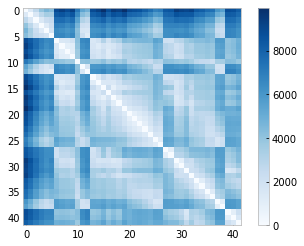

In [15]:
# Visualizing the pairwise_distance array.
plt.imshow(D, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

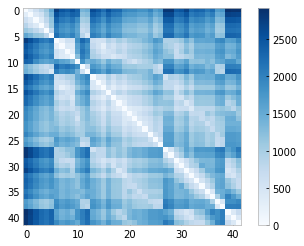

In [16]:
# Visualizing the precomputed travel time matrix array.
plt.imshow(ttm, zorder=2, cmap='Blues', interpolation='nearest')
plt.colorbar();

[[  257.99478167  1940.71215852]
 [  223.39440308  1728.64898473]
 [  238.72446536  1478.4169855 ]
 [  186.70763836  1237.75055324]
 [  -17.91907372  1123.27512105]
 [ -645.11814468  1227.05653894]
 [  975.0041029   -614.52005159]
 [  667.35826331  -486.8061011 ]
 [  832.6940664   -338.3553452 ]
 [  670.53212254  -374.00905071]
 [  745.67280956   416.72573521]
 [ -404.95587855   944.04164933]
 [ -475.52780707  1129.78794116]
 [  698.79938054  -731.7840419 ]
 [  502.40521633  -580.9647855 ]
 [  354.4403725   -356.64402071]
 [  848.87381358  -224.97722392]
 [  301.07898114  -415.13127586]
 [   56.84365534  -440.28432426]
 [   30.08732851  -211.90424937]
 [  111.83812972   -33.76090829]
 [   76.48075224    90.75119424]
 [  -65.03824358   101.4784538 ]
 [ -106.66658309   227.41435716]
 [   89.06225058   396.40170576]
 [ -508.44457079   469.8422047 ]
 [ -343.93926857   493.72527475]
 [  970.58900301  -964.0632005 ]
 [  668.61535632 -1127.41284259]
 [  197.54987887  -736.83468666]
 [   40.15

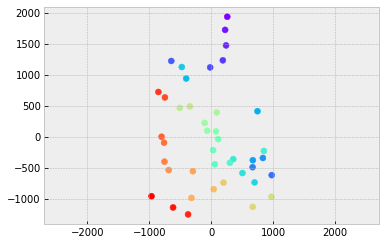

In [17]:
# This makes a copy of the travel time matrix.
ttm2 = ttm

# This performs the multidimensional scaling (MDS).
# Note: The MDS is rotated 90 degrees counterclockwise. This is fixed in the next step.
model = manifold.MDS(n_components=2, dissimilarity='precomputed', random_state=1)
out = model.fit_transform(ttm2)
plt.scatter(out[:, 0], out[:, 1], c=colors)
plt.axis('equal');
print(out)

[]

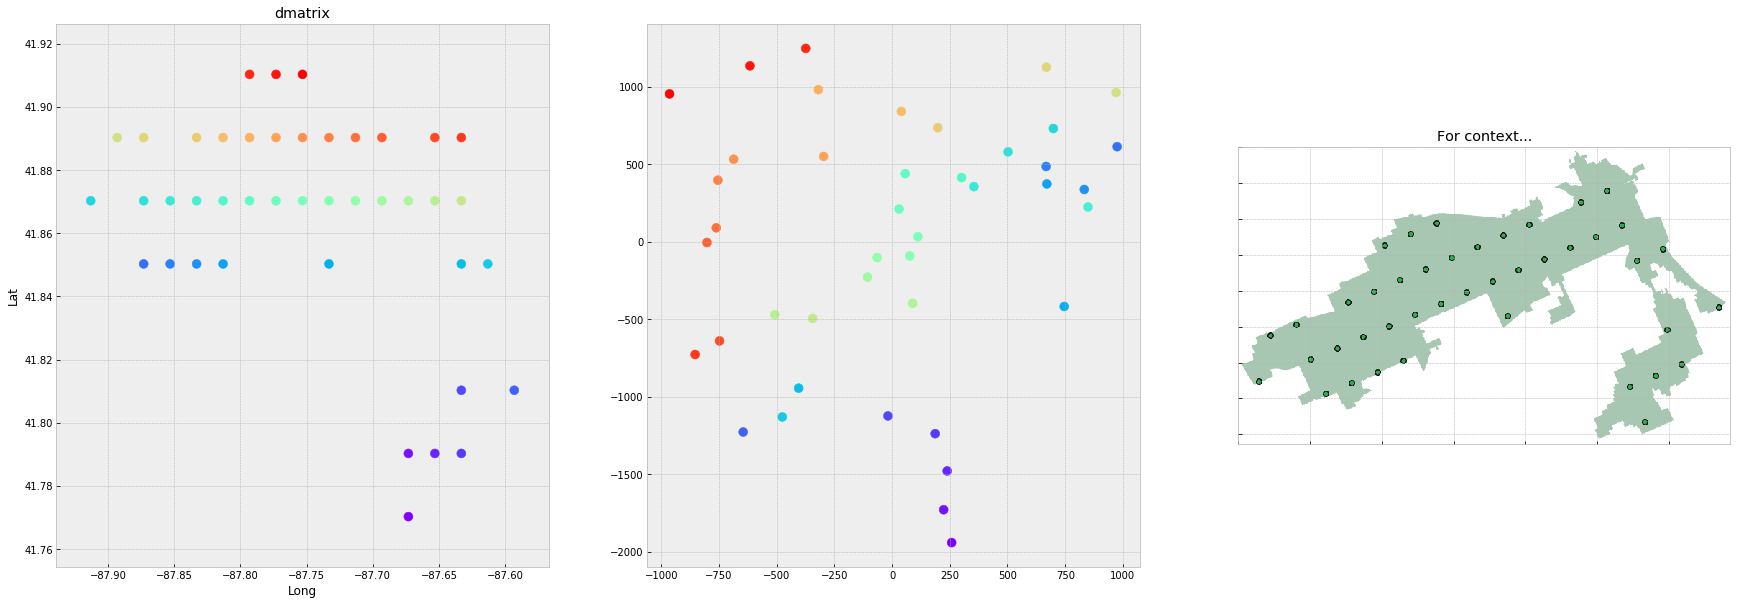

In [20]:
# Comparing the original and the MDS results.
fig, (ax1, ax2, ax3) = plt.subplots(nrows=1, ncols=3, figsize=(30, 10))
plt.style.use(['bmh'])

# This sets the colors for the points.
colors = matplotlib.cm.rainbow(np.linspace(0, 1, len(geopoints)))

ax1.scatter(lat,long, s = 80,  c = colors)
ax1.set_title('dmatrix')
ax1.set_ylabel('Lat')
ax1.set_xlabel('Long')

# Adding a '-' inverts the y value, rotating the MDS to the correct position.
ax2.scatter(out[:, 0], -out[:, 1],s = 80, c = colors)

img = plt.imread('Shapes/Pictures/IL_7_0.02.png')
ax3.imshow(img)
ax3.set_title('For context...')
ax3.set_yticklabels([])
ax3.set_xticklabels([])